# Loading the Dataset
Link to google drive

In [258]:
from google.colab import drive
import numpy as np
import pandas as pd
import sqlite3
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
%ls
%pwd

drive/  sample_data/


'/content'

load the file from the google drive

In [122]:
found_file = False
# Propp's
try:
  with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
    print("found file")
    found_file = True
except FileNotFoundError:
  pass
# Eli
if(not found_file):
  try:
    with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass
# Sabina
if(not found_file):
  try:
    with open('/content/drive/MyDrive/soccer database/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass

if(not found_file):
  print("Failed to find file in google drive")

found file


In [259]:
from sqlite3.dbapi2 import OperationalError
open_file = False
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite')
    open_file = True
  except OperationalError:
    pass
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/soccer database/database.sqlite')
    open_file = True
  except OperationalError:
    pass




matches = pd.read_sql_query("SELECT * FROM Match",con)

players = pd.read_sql("SELECT * FROM Player;", con)

teams = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [260]:
players[players["player_api_id"] == matches["away_player_10"][25977]]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1771,1774,92252,Christian Schneuwly,184285,1988-02-07 00:00:00,177.8,161


In [261]:
binary_class_label = "home_team_win"
binary_class_label_complement = "away_team_win"
matches[binary_class_label] = np.where(matches["home_team_goal"] - matches["away_team_goal"] > 0, 1, 0)
matches[binary_class_label_complement] = np.where(matches["home_team_win"] == 0, 1, 0)

In [262]:
num_home_wins = np.count_nonzero(matches["home_team_win"] == 1)
print(f"Percentage of home wins: {round(num_home_wins / matches.shape[0] * 100, 2)}%")

Percentage of home wins: 45.87%


In [263]:
matches



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [264]:
odds_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
odds_data = matches[odds_features + [binary_class_label]].dropna()

odds_data


,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,...,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,...,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,1
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,...,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,...,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,1
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,...,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,...,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,1
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,...,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,1
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,...,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,...,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,0


In [265]:
odds_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(odds_data[odds_features], odds_data["home_team_win"], test_size=0.2)
X_train

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1122,2.30,3.30,3.10,2.30,3.20,2.85,2.30,3.1,2.80,2.25,...,3.00,2.30,3.40,3.00,2.30,3.20,2.85,2.30,3.25,2.88
3601,4.20,3.75,1.83,3.90,3.50,1.90,3.85,3.4,1.90,4.00,...,1.95,4.10,3.75,1.92,3.90,3.50,1.90,4.00,3.40,1.91
20617,1.40,4.50,7.50,1.40,4.10,7.00,1.40,4.0,6.50,1.44,...,7.50,1.44,4.50,8.50,1.40,4.10,7.00,1.44,4.20,8.00
23187,3.50,3.30,2.10,3.60,3.30,2.05,3.60,3.3,2.00,3.60,...,2.20,3.60,3.50,2.15,3.60,3.30,2.05,3.40,3.25,2.10
14524,2.38,3.50,2.80,2.25,3.40,2.75,2.30,3.2,2.70,2.25,...,2.88,2.38,3.50,3.00,2.25,3.40,2.75,2.38,3.30,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,2.00,3.40,3.75,2.00,3.50,3.60,2.15,3.3,3.20,2.15,...,3.60,2.00,3.40,4.00,2.00,3.50,3.60,2.05,3.40,3.60
11822,3.50,3.60,2.00,3.30,3.75,2.00,3.50,3.4,2.00,3.50,...,2.05,3.50,3.90,2.05,3.30,3.75,2.00,3.60,3.40,2.00
23411,1.85,3.50,4.20,1.80,3.50,4.40,1.85,3.5,3.95,1.85,...,4.00,1.90,3.60,4.40,1.80,3.50,4.40,1.91,3.50,3.75
9032,1.30,5.50,9.00,1.33,5.25,9.25,1.37,4.3,7.20,1.33,...,10.00,1.30,5.75,11.50,1.33,5.25,9.25,1.29,5.50,9.00


In [266]:
testscore = []
for i in range(10):
  odds_rf.fit(X_train, y_train)
  testscore.append(odds_rf.score(X_test, y_test))
trainscore = odds_rf.score(X_train, y_train)
#testscore = odds_rf.score(X_test, y_test)
y_pred_proba = odds_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
#Prints probabilities of home team winning
print(home_team_win_prob)
print(trainscore)
print(testscore)

[0.55 0.84 0.52 0.55 0.53 0.63 0.25 0.83 0.2  0.72 0.12 0.34 0.82 0.42
 0.78 0.23 0.01 0.48 0.33 0.19 0.29 0.72 0.29 0.36 0.42 0.15 0.14 0.48
 0.26 0.69 0.62 0.53 0.07 0.91 0.63 0.46 0.13 0.47 0.29 0.59 0.17 0.54
 0.42 0.46 0.23 0.73 0.5  0.61 0.2  0.29 0.46 0.19 0.68 0.3  0.11 0.87
 0.65 0.19 0.21 0.37 0.31 0.09 0.14 0.22 0.43 0.46 0.53 0.72 0.63 0.36
 0.32 0.41 0.47 0.02 0.43 0.49 0.99 0.54 0.87 0.31 0.04 0.99 0.5  0.8
 0.52 0.81 0.44 0.6  0.34 0.12 0.82 0.38 0.47 0.35 0.81 0.46 0.62 0.9
 0.52 0.34 0.18 0.24 0.62 0.69 0.72 0.43 0.42 0.75 0.47 0.53 0.27 0.6
 0.23 0.37 0.79 0.79 0.24 0.7  0.16 0.11 0.34 0.51 0.44 0.84 0.02 0.73
 0.4  0.06 0.44 0.65 0.74 0.61 0.42 0.58 0.69 0.61 0.15 0.59 0.21 0.83
 0.25 0.59 0.5  0.71 0.15 0.44 0.51 0.41 0.36 0.57 0.38 0.42 0.1  0.18
 0.22 0.26 0.53 0.61 0.38 0.49 0.68 0.57 0.16 0.29 0.63 0.19 0.58 0.64
 0.7  0.56 0.73 0.45 0.31 0.4  0.33 0.15 0.08 0.43 0.58 0.56 0.17 0.39
 0.21 0.28 0.42 0.26 0.2  0.54 0.67 0.4  0.88 0.26 0.12 0.32 0.24 0.45
 0.43 0.5

In [267]:
odds_rf.oob_score_

0.6229582577132486

In [268]:
y_pred = odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6231884057971014


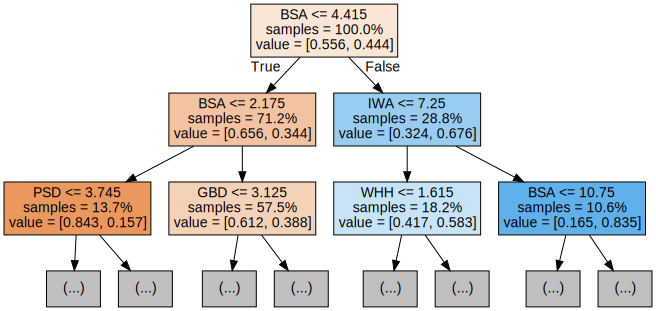

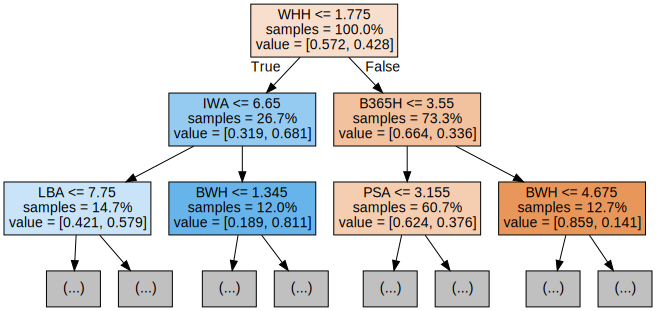

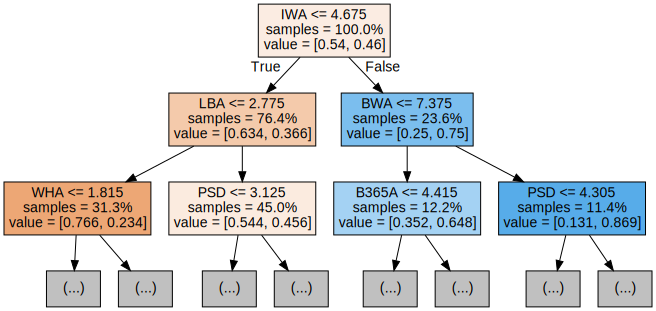

In [200]:
for i in range(3):
    tree = odds_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [270]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 408}


In [271]:
new_odds_rf = best_rf
testscores = []
for i in range(10):
  new_odds_rf.fit(X_train, y_train)
  testscores.append(new_odds_rf.score(X_test, y_test))
trainscore = new_odds_rf.score(X_train, y_train)
testscore = new_odds_rf.score(X_test, y_test)
y_pred_proba = new_odds_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print(trainscore)
print(testscores)

0.6574410163339383
[0.6684782608695652, 0.6666666666666666, 0.6684782608695652, 0.6702898550724637, 0.6684782608695652, 0.6702898550724637, 0.6721014492753623, 0.6702898550724637, 0.6666666666666666, 0.6702898550724637]


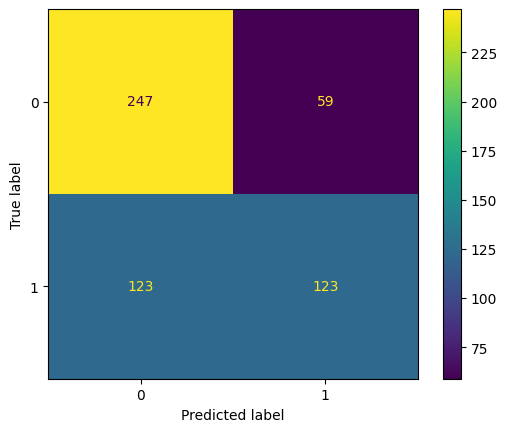

In [272]:
y_pred = new_odds_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [273]:
y_pred = new_odds_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6702898550724637
Precision: 0.6758241758241759
Recall: 0.5


Text(0.5, 1.0, 'Global Feature Importance')

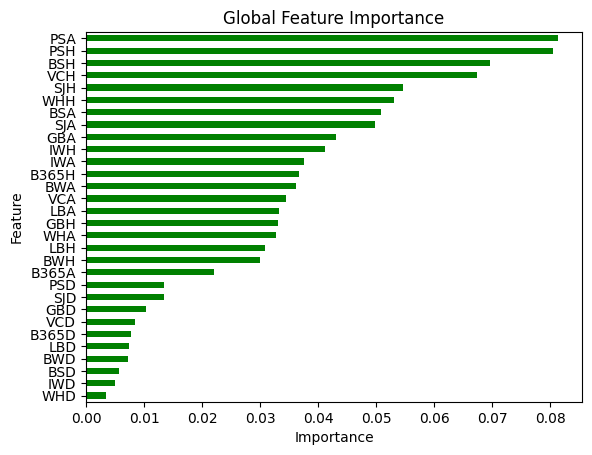

In [277]:
global_importances = pd.Series(new_odds_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

<Axes: >

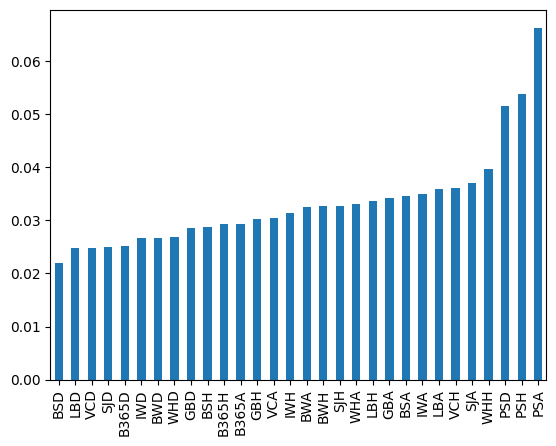

In [275]:
global_importances.plot.bar()

In [139]:
top_k = len(odds_features) # the number of top features to select

train_error = []
test_error = []
num_features = list(range(1, top_k))
for k in num_features:
    top_k_features = list(global_importances.head(k)["feature_name"])
    top_k_odds_rf = RandomForestClassifier(odds_data[top_k_features + [binary_class_label]], top_k_features, suppress_print=True)
    tr_err, te_err = train_test_error(top_k_odds_rf, top_k_features, suppress_print=True)
    train_error.append(tr_err)
    test_error.append(te_err)

plot_errors(train_error, test_error, num_features)

KeyError: ignored

In [283]:
most_important = ["PSA", "PSH", "BSH", "VCH", "SJH", "WHH", "BSA", "SJA", "GBA", "IWH"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
better_odds_rf = best_rf
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
for i in range(10):
  better_odds_rf.fit(X_train, y_train)
  score = better_odds_rf.score(X_test, y_test)
  print(score)
print(better_odds_rf.score(X_test, y_test))
print(better_odds_rf.score(X_test, y_test))
y_pred = better_odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6672694394213382
0.6708860759493671
0.6690777576853526
0.6690777576853526
0.6690777576853526
0.6672694394213382
0.6708860759493671
0.6672694394213382
0.6672694394213382
0.6672694394213382
0.6672694394213382
0.6672694394213382
Accuracy: 0.6672694394213382


In [284]:
most_important = ["PSA", "PSH", "BSH", "VCH"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
better_odds_rf = best_rf
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
for i in range(10):
  better_odds_rf.fit(X_train, y_train)
  score = better_odds_rf.score(X_test, y_test)
  print(score)
print(better_odds_rf.score(X_test, y_test))
print(better_odds_rf.score(X_test, y_test))
y_pred = better_odds_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6577060931899642
0.6559139784946236
0.6594982078853047
0.6594982078853047
0.6577060931899642
0.6541218637992832
0.6559139784946236
0.6594982078853047
0.6559139784946236
0.6630824372759857
0.6630824372759857
0.6630824372759857
Accuracy: 0.6630824372759857


In [222]:
goal_rf = RandomForestClassifier(oob_score=True)
home_goal = ["home_team_goal", "away_team_goal"]

goal_data = matches[home_goal].dropna()
X_train, X_test, y_train, y_test = train_test_split(goal_data, matches["home_team_win"], test_size=0.2)

In [223]:
goal_rf.fit(X_train, y_train)
goal_rf.oob_score_
y_pred = goal_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


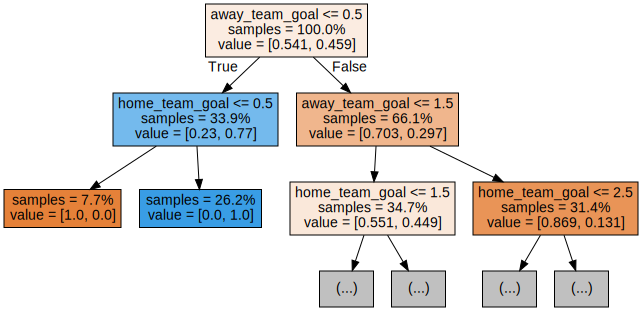

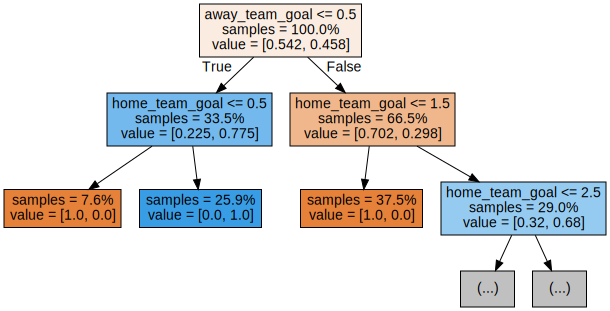

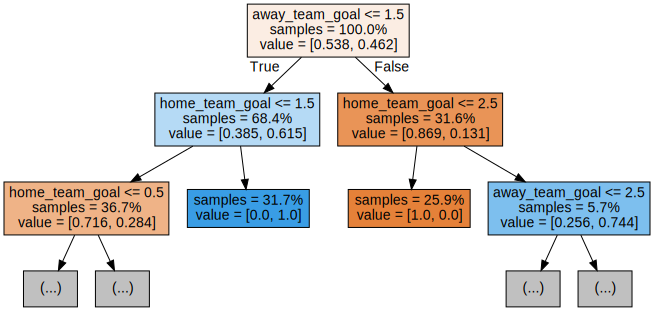

In [225]:
for i in range(3):
    tree = goal_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
rand_rf = RandomForestClassifier(oob_score=True)
feat = ['shoton', 'shotoff', 'goal', 'foulcommit', 'card', 'cross', 'corner', 'possession']
rand_data = matches[feat + [binary_class_label]].dropna()

X_train, X_test, y_train, y_test = train_test_split(rand_data[feat], rand_data[binary_class_label], test_size=0.2)
rand_data

,shoton,shotoff,goal,foulcommit,card,cross,corner,possession,home_team_win
1728,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,0
1729,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1
1730,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,0
1731,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1
1732,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1
...,...,...,...,...,...,...,...,...,...
25944,<shoton />,<shotoff />,<goal><value><comment>o</comment><stats><owngo...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25945,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1
25946,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0
25947,<shoton />,<shotoff />,<goal><value><comment>n</comment><stats><goals...,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0


In [ ]:
#rand_rf.fit(X_train, y_train)
#rand_rf.oob_score_

FIFA Attributes

In [143]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [144]:
buildup_features = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
chance_creation_features = ["chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting"]
defence_features = ["defencePressure", "defenceAggression", "defenceTeamWidth"]
categories = [buildup_features, chance_creation_features, defence_features]

aggregations = ["mean", "min", "max", "median"]

all_attr_features = []
for category in categories:
    all_attr_features += category

all_attr_features_agg = []
categories_agg = []
for category in categories:
    category_agg = []
    for agg in aggregations:
        for feature in category:
            formatted_feature_name = f"{feature}_{agg}"
            category_agg.append(formatted_feature_name)
            all_attr_features_agg.append(formatted_feature_name)
    categories_agg.append(category_agg)

len(all_attr_features_agg)

36

In [145]:
aggregated_attributes = team_attributes.groupby("team_api_id").agg(
    {feature : [(f"{feature}_{agg}", agg) for agg in aggregations]for feature in all_attr_features}
).reset_index(col_level = 1).droplevel(level = 0, axis = 1)[["team_api_id"] + all_attr_features_agg]

aggregated_attributes.head()

,team_api_id,buildUpPlaySpeed_mean,buildUpPlayDribbling_mean,buildUpPlayPassing_mean,buildUpPlaySpeed_min,buildUpPlayDribbling_min,buildUpPlayPassing_min,buildUpPlaySpeed_max,buildUpPlayDribbling_max,buildUpPlayPassing_max,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
0,1601,47.333333,48.0,46.166667,30,48.0,38,53,48.0,55,...,49.333333,43,44,49,65,60,50,43.0,44.0,49.0
1,1773,52.000000,51.0,50.000000,52,51.0,50,52,51.0,50,...,50.000000,43,44,50,43,44,50,43.0,44.0,50.0
2,1957,47.166667,54.0,52.666667,30,54.0,38,66,54.0,69,...,53.666667,32,50,49,70,70,70,48.5,56.0,51.0
3,2033,49.000000,62.0,48.400000,45,62.0,40,65,62.0,55,...,45.400000,37,24,35,50,45,60,37.0,31.0,44.0
4,2182,60.333333,52.5,49.000000,40,50.0,35,67,55.0,57,...,54.500000,47,37,45,60,58,63,48.5,47.0,55.5


In [146]:
def attribute_matchup(dataset, home_id, away_id):
    """
    Computes the matchup features for the home_id and away_id.
    """
    home = dataset[dataset["team_api_id"] == home_id][all_attr_features_agg].to_numpy()
    away = dataset[dataset["team_api_id"] == away_id][all_attr_features_agg].to_numpy()
    if len(home) == 0 or len(away) == 0:
        # Team not present, no matchup possible
        return pd.Series([np.nan] * len(all_attr_features_agg), index = all_attr_features_agg)
    diff = (home - away)[0]
    return pd.Series(diff, index = all_attr_features_agg)

In [147]:
attr_data = matches.copy()
attr_data[all_attr_features_agg] = attr_data.apply(lambda x: attribute_matchup(aggregated_attributes, x["home_team_api_id"], x["away_team_api_id"]), axis = 1, result_type = "expand")

In [148]:
attr_data = attr_data.dropna()

In [229]:
attr_rf = RandomForestClassifier(oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(attr_data[all_attr_features_agg], attr_data[binary_class_label], test_size=0.2)
attr_rf.fit(X_train, y_train)
trainscore = attr_rf.score(X_train, y_train)
testscore = attr_rf.score(X_test, y_test)

path = attr_rf.decision_path(X_train)

y_pred = attr_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(trainscore)
print(testscore)
#print("Accuracy:", accuracy)

1.0
0.5892351274787535


Text(0.5, 1.0, 'Global Feature Importance')

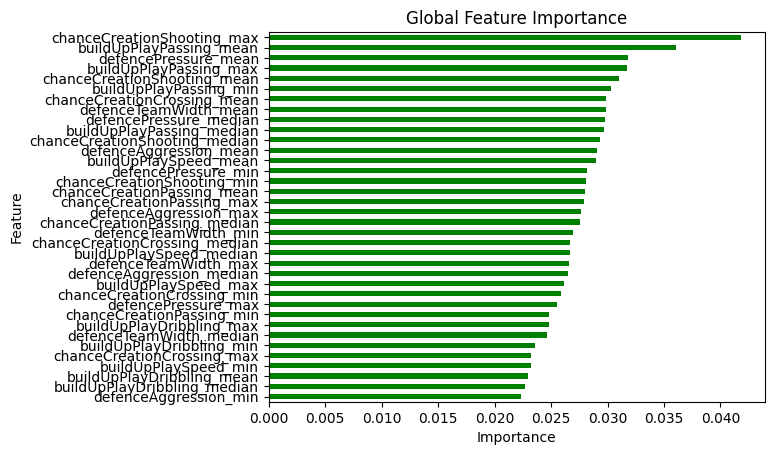

In [230]:
global_importances = pd.Series(attr_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

In [231]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 334}


In [232]:
new_attr_rf = best_rf
new_attr_rf.fit(X_train, y_train)
trainscore = new_attr_rf.score(X_train, y_train)
testscore = new_attr_rf.score(X_test, y_test)
y_pred_proba = new_attr_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print(trainscore)
print(testscore)

0.99361249112846
0.5977337110481586


In [163]:
buildup_rf = RandomForestClassifier(oob_score=True)
imputer = SimpleImputer(strategy='median')
buildup = ["buildUpPlaySpeed_max", "buildUpPlaySpeed_min", "buildUpPlaySpeed_median", "buildUpPlaySpeed_mean", "buildUpPlayDribbling_max","buildUpPlayDribbling_min", "buildUpPlayDribbling_mean", "buildUpPlayDribbling_median", "buildUpPlayPassing_max", "buildUpPlayPassing_min", "buildUpPlayPassing_mean", "buildUpPlayPassing_median"]
attr_data[buildup] = imputer.fit_transform(attr_data[buildup])
if attr_data["home_team_win"].isnull().any():
    attr_data.dropna(subset=["home_team_win"], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(attr_data[buildup], attr_data["home_team_win"], test_size=0.2)
buildup_rf.fit(X_train, y_train)
y_pred_proba = buildup_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print("Probabilities that home team will win: ")
print(home_team_win_prob)

score = buildup_rf.score(X_test, y_test)
print(score)

Probabilities that home team will win: 
[0.33 0.48 0.37 0.67 0.3  0.56 0.49 0.17 0.11 0.39 0.46 0.34 0.22 0.43
 0.67 0.33 0.23 0.69 0.7  0.4  0.68 0.29 0.51 0.34 0.48 0.45 0.43 0.53
 0.63 0.41 0.29 0.21 0.53 0.67 0.12 0.35 0.24 0.59 0.72 0.54 0.69 0.5
 0.46 0.48 0.57 0.34 0.52 0.48 0.59 0.46 0.13 0.48 0.37 0.39 0.7  0.52
 0.39 0.39 0.57 0.38 0.42 0.34 0.49 0.77 0.41 0.36 0.52 0.29 0.55 0.28
 0.39 0.78 0.55 0.39 0.3  0.49 0.26 0.3  0.54 0.54 0.55 0.54 0.59 0.42
 0.49 0.65 0.57 0.48 0.43 0.21 0.23 0.22 0.16 0.6  0.61 0.64 0.28 0.37
 0.28 0.12 0.49 0.37 0.44 0.56 0.4  0.35 0.34 0.61 0.62 0.63 0.45 0.52
 0.28 0.32 0.35 0.5  0.35 0.35 0.33 0.42 0.43 0.4  0.46 0.45 0.41 0.44
 0.8  0.48 0.47 0.21 0.54 0.4  0.48 0.49 0.58 0.58 0.26 0.38 0.61 0.24
 0.46 0.38 0.61 0.33 0.52 0.39 0.45 0.18 0.52 0.43 0.31 0.44 0.3  0.36
 0.34 0.47 0.78 0.46 0.39 0.52 0.57 0.41 0.47 0.36 0.62 0.47 0.36 0.55
 0.49 0.5  0.41 0.78 0.7  0.39 0.42 0.43 0.53 0.33 0.23 0.35 0.41 0.66
 0.69 0.52 0.41 0.61 0.6  0.51 0.71 0.

In [233]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 460}


In [234]:
new_buildup_rf = best_rf
new_buildup_rf.fit(X_train, y_train)
trainscore = new_buildup_rf.score(X_train, y_train)
testscore = new_buildup_rf.score(X_test, y_test)
y_pred_proba = new_buildup_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print(trainscore)
print(testscore)

0.6174591909155429
0.5609065155807366


Text(0.5, 1.0, 'Global Feature Importance')

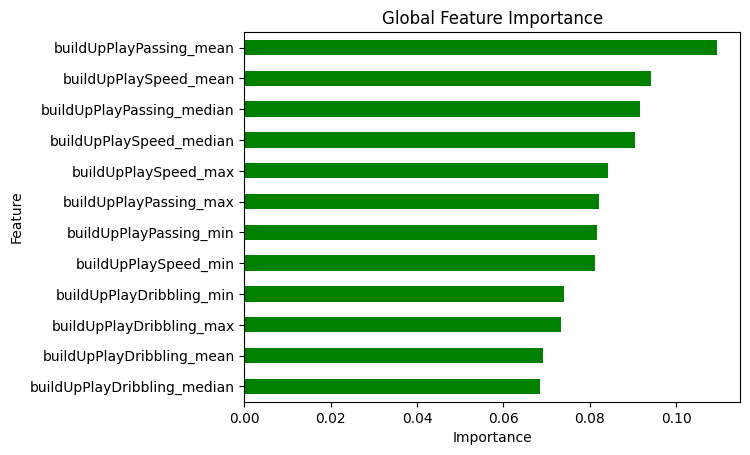

In [153]:
global_importances = pd.Series(buildup_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

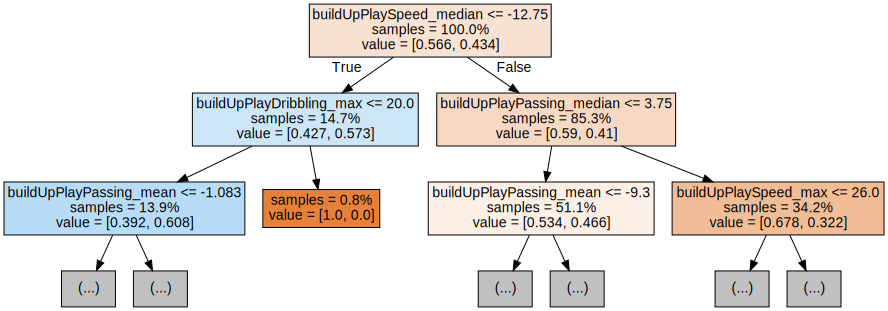

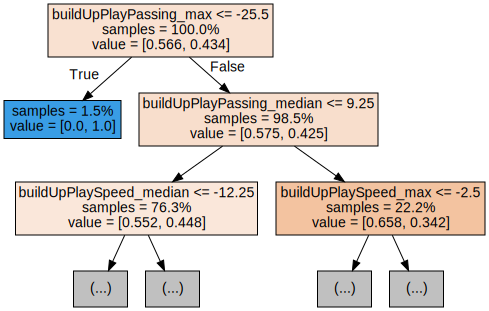

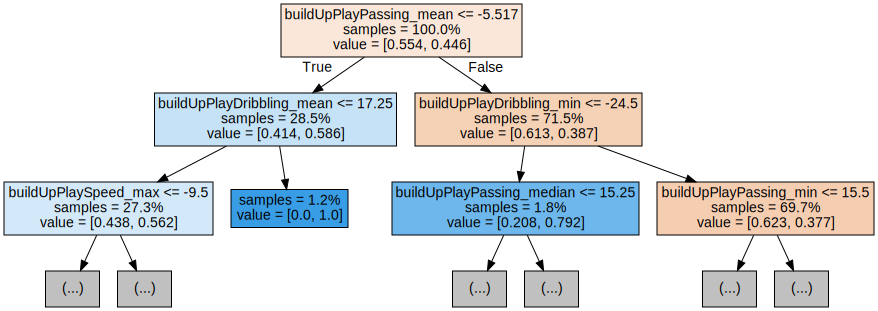

In [154]:
for i in range(3):
    tree = buildup_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [164]:
chanceCreation_rf = RandomForestClassifier(oob_score=True)
imputer = SimpleImputer(strategy='median')
chance = ["chanceCreationShooting_max", "chanceCreationShooting_min", "chanceCreationShooting_median", "chanceCreationShooting_mean", "chanceCreationPassing_max","chanceCreationPassing_min", "chanceCreationPassing_mean", "chanceCreationPassing_median", "chanceCreationCrossing_max", "chanceCreationCrossing_min", "chanceCreationCrossing_mean", "chanceCreationCrossing_median"]
attr_data[chance] = imputer.fit_transform(attr_data[chance])
if attr_data["home_team_win"].isnull().any():
    attr_data.dropna(subset=["home_team_win"], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(attr_data[chance], attr_data["home_team_win"], test_size=0.2)
chanceCreation_rf.fit(X_train, y_train)
y_pred_proba = chanceCreation_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print("Probabilities that home team will win: ")
print(home_team_win_prob)

score = chanceCreation_rf.score(X_test, y_test)
print(score)

Probabilities that home team will win: 
[0.44 0.59 0.32 0.51 0.49 0.18 0.53 0.24 0.42 0.44 0.44 0.25 0.32 0.35
 0.51 0.72 0.55 0.39 0.34 0.41 0.21 0.56 0.56 0.29 0.51 0.46 0.39 0.28
 0.4  0.61 0.41 0.59 0.55 0.39 0.27 0.39 0.51 0.4  0.51 0.72 0.63 0.48
 0.73 0.33 0.68 0.28 0.37 0.33 0.29 0.29 0.45 0.41 0.35 0.52 0.45 0.33
 0.37 0.42 0.39 0.4  0.61 0.27 0.63 0.32 0.63 0.62 0.53 0.3  0.42 0.52
 0.44 0.31 0.47 0.54 0.66 0.61 0.63 0.29 0.38 0.45 0.51 0.48 0.41 0.33
 0.5  0.42 0.6  0.42 0.49 0.5  0.39 0.48 0.36 0.35 0.56 0.51 0.69 0.5
 0.33 0.51 0.51 0.2  0.58 0.24 0.52 0.45 0.44 0.25 0.2  0.56 0.45 0.41
 0.47 0.34 0.39 0.5  0.53 0.37 0.36 0.61 0.42 0.59 0.55 0.59 0.28 0.62
 0.41 0.76 0.36 0.69 0.86 0.38 0.35 0.38 0.58 0.44 0.45 0.54 0.24 0.84
 0.63 0.61 0.5  0.38 0.3  0.42 0.33 0.33 0.64 0.8  0.41 0.64 0.44 0.48
 0.47 0.63 0.41 0.57 0.43 0.31 0.46 0.6  0.58 0.36 0.62 0.51 0.26 0.3
 0.37 0.4  0.66 0.44 0.33 0.37 0.4  0.62 0.36 0.6  0.66 0.29 0.48 0.35
 0.34 0.56 0.37 0.44 0.36 0.66 0.46 0.3

Text(0.5, 1.0, 'Global Feature Importance')

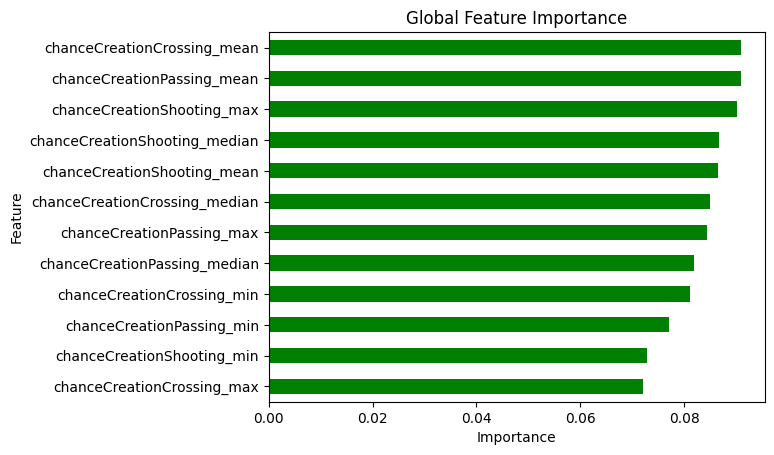

In [160]:
global_importances = pd.Series(chanceCreation_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

In [238]:
defence_rf = RandomForestClassifier(oob_score=True)
imputer = SimpleImputer(strategy='median')
defence = ["defencePressure_max", "defencePressure_min", "defencePressure_median", "defencePressure_mean", "defenceAggression_max","defenceAggression_min", "defenceAggression_mean", "defenceAggression_median", "defenceTeamWidth_max", "defenceTeamWidth_min", "defenceTeamWidth_mean", "defenceTeamWidth_median"]
attr_data[defence] = imputer.fit_transform(attr_data[defence])
if attr_data["home_team_win"].isnull().any():
    attr_data.dropna(subset=["home_team_win"], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(attr_data[defence], attr_data["home_team_win"], test_size=0.2)
defence_rf.fit(X_train, y_train)
y_pred_proba = defence_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print("Probabilities that home team will win: ")
print(home_team_win_prob)

score = defence_rf.score(X_test, y_test)
print(score)

Probabilities that home team will win: 
[0.48 0.4  0.48 0.26 0.32 0.34 0.43 0.43 0.48 0.37 0.26 0.46 0.33 0.3
 0.44 0.62 0.67 0.49 0.57 0.58 0.37 0.72 0.65 0.48 0.55 0.6  0.22 0.4
 0.47 0.2  0.55 0.5  0.42 0.46 0.54 0.69 0.61 0.42 0.26 0.4  0.34 0.31
 0.43 0.21 0.65 0.31 0.53 0.66 0.37 0.35 0.47 0.38 0.39 0.55 0.46 0.52
 0.33 0.3  0.42 0.44 0.43 0.32 0.58 0.45 0.35 0.32 0.45 0.62 0.46 0.31
 0.59 0.46 0.51 0.36 0.49 0.58 0.47 0.41 0.58 0.4  0.45 0.41 0.67 0.52
 0.21 0.57 0.42 0.45 0.45 0.55 0.29 0.24 0.51 0.58 0.4  0.31 0.52 0.39
 0.44 0.51 0.28 0.54 0.5  0.39 0.37 0.71 0.27 0.56 0.44 0.49 0.47 0.22
 0.52 0.41 0.51 0.24 0.51 0.75 0.69 0.46 0.31 0.5  0.32 0.6  0.3  0.43
 0.53 0.39 0.46 0.77 0.33 0.52 0.3  0.54 0.34 0.62 0.42 0.49 0.24 0.48
 0.31 0.36 0.4  0.5  0.46 0.28 0.48 0.44 0.61 0.53 0.33 0.38 0.29 0.26
 0.44 0.51 0.51 0.66 0.31 0.41 0.66 0.49 0.32 0.61 0.42 0.43 0.33 0.65
 0.38 0.56 0.48 0.38 0.6  0.43 0.37 0.55 0.42 0.54 0.36 0.52 0.36 0.4
 0.28 0.49 0.33 0.36 0.31 0.75 0.4  0.59

Text(0.5, 1.0, 'Global Feature Importance')

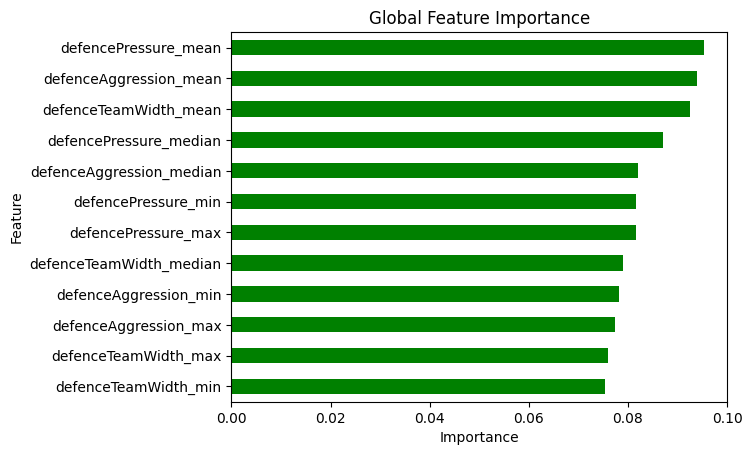

In [162]:
global_importances = pd.Series(defence_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

Overall attributes = 0.6402266288951841 \\
Buildup = 0.546742209631728 \\
Chance Creation = 0.5637393767705382 \\
Defence = 0.5807365439093485

In [289]:
test_rf = RandomForestClassifier(oob_score=True)
best_feat = ["defencePressure_mean", "defenceAggression_mean", "defenceTeamWidth_mean", "chanceCreationCrossing_mean", "chanceCreationPassing_mean", "chanceCreationShooting_max", "buildUpPlayPassing_mean", "buildUpPlaySpeed_mean", "buildUpPlayPassing_median"]
X_train, X_test, y_train, y_test = train_test_split(attr_data[best_feat], attr_data[binary_class_label], test_size=0.2)
test_rf.fit(X_train, y_train)
score = test_rf.score(X_test, y_test)
print(score)
path = test_rf.decision_path(X_train)

0.5920679886685553


In [286]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 409}


In [294]:
new_optimal_rf = RandomForestClassifier(max_depth=8, n_estimators=1000)
testscores = []
for i in range(10):
  new_optimal_rf.fit(X_train, y_train)
  testscores.append(new_optimal_rf.score(X_test, y_test))
trainscore = new_optimal_rf.score(X_train, y_train)
testscore = new_optimal_rf.score(X_test, y_test)
y_pred_proba = new_optimal_rf.predict_proba(X_test)
home_team_win_prob = y_pred_proba[:, 1]
print(trainscore)
print(testscores)
print(np.mean(testscores))

0.9112845990063875
[0.6147308781869688, 0.5977337110481586, 0.6005665722379604, 0.603399433427762, 0.6090651558073654, 0.5977337110481586, 0.6147308781869688, 0.6118980169971672, 0.603399433427762, 0.5864022662889519]
0.6039660056657224


Text(0.5, 1.0, 'Global Feature Importance')

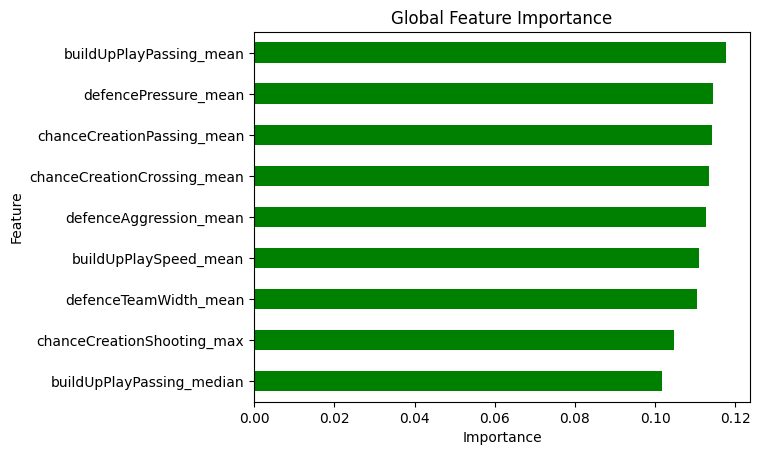

In [177]:
global_importances = pd.Series(test_rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")